#Task: to make a model that predicts glass type
##Using KNN Classifier

In [79]:
import pandas as pd
import numpy as  np

url = 'https://raw.githubusercontent.com/Sanyam200452/KNN-on-glass.csv/main/glass.csv'
df = pd.read_csv(url)


In [42]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [43]:
y = df['Type']
x = df.drop('Type',axis=1)

In [44]:
x.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [45]:
x.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


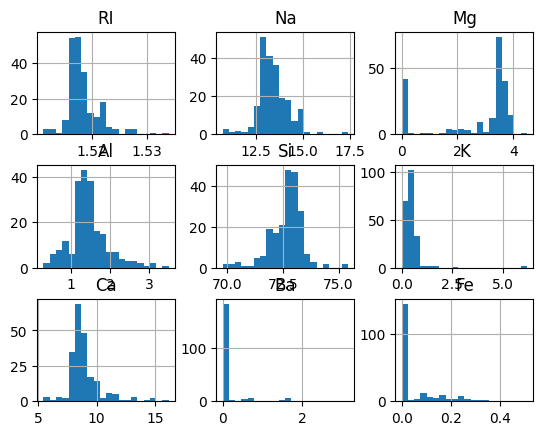

In [59]:
x.hist(bins = 20)
plt.show()

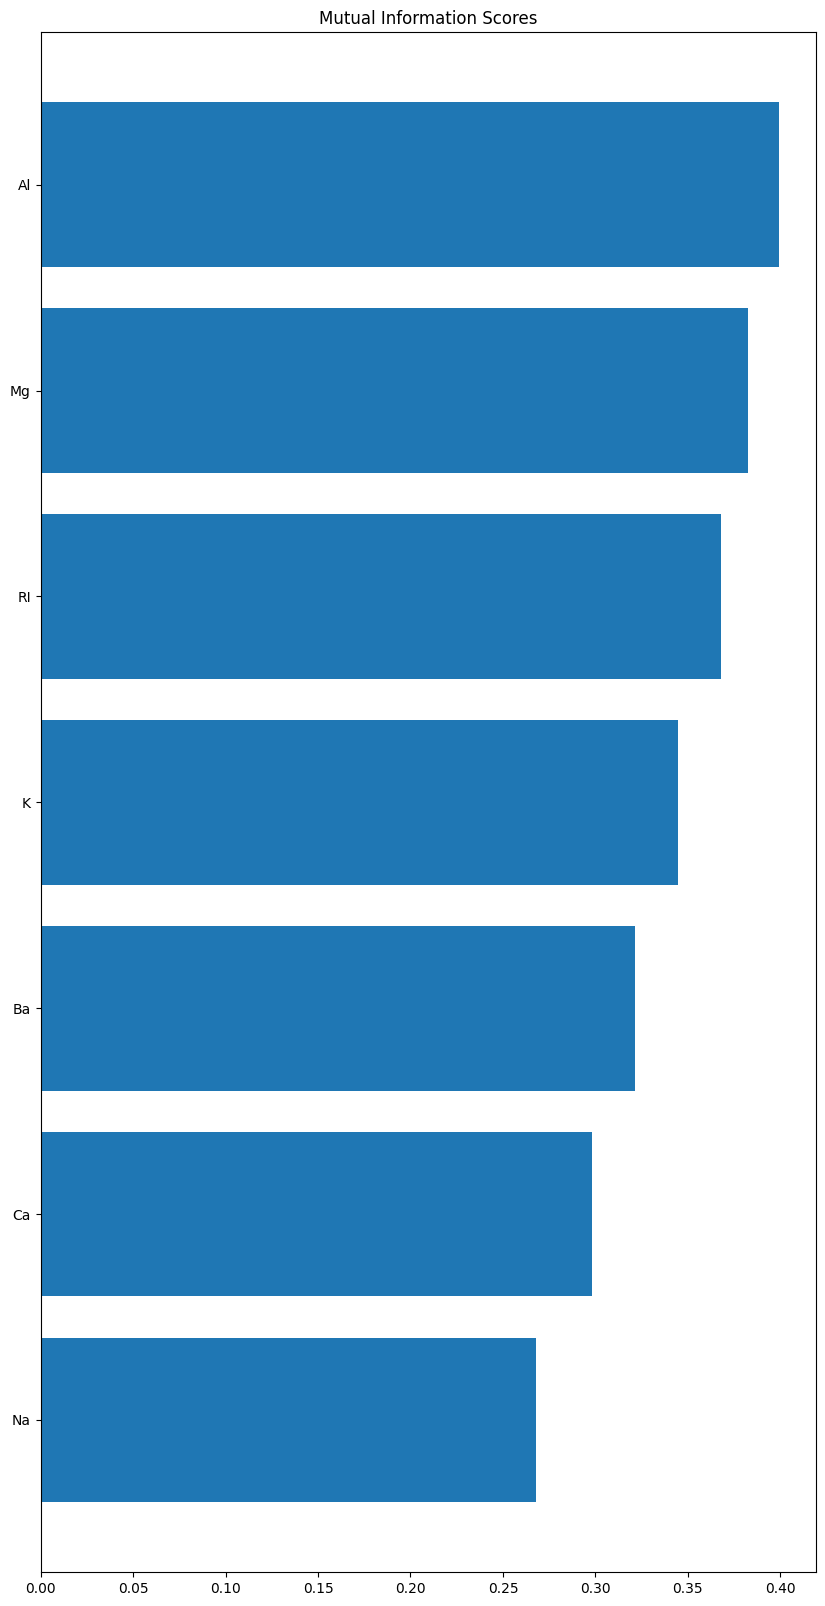

In [86]:

from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y):
    X = X.copy()
    X=X.fillna(0)
    mi_scores = mutual_info_regression(X, y, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.figure(figsize=(10, 20))
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


mi_scores = make_mi_scores(x, y)
plot_mi_scores(mi_scores)

In [62]:
x.drop(['Fe','Si'],axis=1,inplace=True)

##Preprocessing(don't need to do much for this data)

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [65]:
x_train.shape

(171, 7)

In [70]:
K = int(np.sqrt(x_train.shape[0]))
acc = []
for i in range(1,K):
    knn = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    acc.append((i, accuracy_score(y_test,y_pred)))

In [71]:
acc

[(1, 0.8372093023255814),
 (2, 0.8372093023255814),
 (3, 0.8372093023255814),
 (4, 0.8604651162790697),
 (5, 0.813953488372093),
 (6, 0.8372093023255814),
 (7, 0.813953488372093),
 (8, 0.7906976744186046),
 (9, 0.7674418604651163),
 (10, 0.7906976744186046),
 (11, 0.7674418604651163),
 (12, 0.7674418604651163)]

In [73]:
from sklearn.model_selection import GridSearchCV

def perform_grid_search(estimator, param_grid, cv=5, scoring=None):
    """
    Performs grid search cross-validation for hyperparameter tuning.

    Args:
        estimator: The machine learning model (estimator) to tune.
        param_grid: A dictionary with parameter names as keys and lists of parameter settings to try as values.
        cv: Number of cross-validation folds (default is 5).
        scoring: Scoring strategy to evaluate model performance (e.g., 'accuracy', 'precision', 'recall', etc.).

    Returns:
        A trained GridSearchCV object with the best hyperparameters.
    """
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring=scoring)
    grid_search.fit(x_train, y_train)  # Replace X_train and y_train with your data
    return grid_search


In [78]:
knn = KNeighborsClassifier()
param_grid_rf = {
    'n_neighbors': [2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50]
}
best_knn_model = perform_grid_search(knn, param_grid_rf, scoring='accuracy')
print("Best hyperparameters:", best_knn_model.best_params_)

Best hyperparameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 2, 'weights': 'distance'}


In [83]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance')
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8604651162790697

#Done!, made a knn classifier on glass data that gives 86% accuracy